In [150]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sns


##Use the K-NN machine learning algorithm to Classify Single Cell RNA-seq in Glioblastoma patients using the Data_Glioblastoma5Patients_SC.csv database

###Exploratory Data Analysis

In [151]:
df = pd.read_csv('/content/Data_Glioblastoma5Patients_SC.csv')
df.head(5)

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,ABAT,ABCA1,ABCA8,ABCB6,ABCC3,ABCC5,ABCC9,ABCD2,ABCD3,ABCD4,ABCE1,ABCF2,ABCF3,ABHD2,ABHD4,ABHD5,ABHD14B,ABI1,ABI2,ABL2,ABLIM1,ABR,ABT1,ACAA2,ACACA,ACAD8,ACAD9,ACAD10,ACAD11,ACADM,...,ZNF770,ZNF772,ZNF773,ZNF776,ZNF780A,ZNF791,ZNF793,ZNF805,ZNF808,ZNF814,ZNF816,ZNF829,ZNF830,ZNF841,ZNF844,ZNF850,ZNF862,ZNF880,ZNF883,ZNFX1,ZNFX1-AS1,ZNHIT1,ZNHIT3,ZNHIT6,ZNRF2P1,ZRANB2,ZSCAN12,ZSCAN21,ZSCAN22,ZSCAN30,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3,Classes
0,-3.80147,-3.889900,-3.985616,2.651558,2.170748,-2.550822,4.807330,3.961170,-0.192665,3.614482,3.145744,-6.300596,-1.037896,-1.697449,0.281673,-3.483732,0.366422,-1.758436,2.328579,3.569519,3.058874,-5.020620,3.455095,5.360829,-3.132973,-1.776082,-1.114214,-3.618139,3.375385,-2.839989,4.980708,0.847203,-2.501893,4.321275,-2.578574,-3.251265,-0.977721,6.692785,4.391413,-4.407349,...,-1.928611,-2.381917,-2.019576,3.752837,-2.109785,-4.327689,-3.576037,-3.931553,4.193754,-3.781160,-0.768254,3.956435,4.698375,-2.078858,-1.157983,-0.635406,4.360770,-2.897545,4.623799,-0.338262,2.730227,1.403326,4.114219,1.242187,0.778259,2.314585,-1.866753,-2.658178,-1.404574,6.262256,2.909466,-3.118284,-1.538324,-1.550699,-1.558581,-1.920271,3.007439,-2.509017,-2.149696,Class1
1,-3.80147,-3.889900,-3.158708,2.358992,-6.041792,-0.056092,3.606735,-2.632250,2.249388,6.857517,3.001530,-6.300596,-2.643811,-1.697449,-0.594970,-3.483732,-0.715152,-1.758436,0.079525,-4.672306,1.550318,3.529797,4.299342,-3.464369,-3.132973,-2.924431,-1.114214,-3.618139,-5.499261,3.223832,4.941812,-1.369966,5.181664,-3.728585,-2.578574,-3.251265,5.960015,-2.396851,-1.828288,-4.407349,...,6.028423,-0.358707,0.657182,-3.322118,-1.289122,0.161218,-2.150750,4.697638,-1.785149,-5.108033,-1.916603,-3.182185,5.156035,-0.738333,-1.157983,-0.728041,5.667776,-2.897545,6.279306,-4.184515,2.242509,0.400572,-2.641480,-3.112942,0.676547,2.755091,-1.866753,3.983398,-0.390883,2.912340,-1.821098,-3.118284,-1.538324,-1.550699,-1.558581,-3.068620,2.539560,2.164481,-2.149696,Class1
2,-3.80147,-3.889900,1.733125,-5.820241,-6.041792,-0.576957,-2.473517,-4.354127,0.063178,-2.570976,-3.560386,-0.386836,-2.643811,-1.697449,-1.935495,-3.483732,2.782793,-1.758436,1.250684,-4.672306,-4.562244,-5.020620,-4.334143,-0.221083,-3.132973,-2.924431,-1.114214,-3.618139,-1.334237,-2.839989,-3.623272,-1.369966,-2.501893,-0.485300,0.664712,-3.251265,-2.757275,-2.396851,-4.498114,-4.407349,...,-1.928611,2.061042,-2.019576,-3.322118,3.585565,-4.327689,1.861836,-3.931553,-1.785149,-0.693441,1.450269,3.127840,-2.196566,-2.078858,-1.157983,3.323435,-1.724846,-2.897545,-2.195450,-4.184515,3.089869,2.628143,0.601805,0.130343,3.230425,-5.774478,-1.866753,-2.658178,3.027105,-2.593571,-1.821098,5.521892,-1.538324,-1.550699,-1.558581,0.174665,-0.165409,0.734268,-2.149696,Class1
3,-3.80147,-3.889900,-1.665669,3.514271,-6.041792,-3.699171,4.509461,-4.354127,2.985972,-2.570976,4.754989,3.339154,0.372788,-1.697449,-1.935495,6.003834,1.247451,-1.758436,6.053040,-4.672306,-1.456905,-5.020620,-4.334143,-3.464369,6.239284,-2.924431,-1.114214,-3.618139,-5.499261,0.793322,3.664330,6.421675,-2.501893,-3.728585,4.268041,-3.251265,-2.757275,-2.396851,3.255898,4.477037,...,-1.928611,-0.117984,-2.019576,-3.322118,0.154148,-4.327689,4.613435,2.755160,0.478784,-2.002694,0.828524,-0.851291,-2.196566,1.907614,-1.157983,0.190208,-1.724846,-2.897545,5.668627,-2.647718,2.391857,1.659745,6.321970,-3.112942,-3.496636,2.147303,-1.866753,-2.658178,-1.404574,4.453041,4.952176,-0.854351,-1.538324,-1.550699,-1.558581,-3.068620,-1.884744,-2.509017,-2.149696,Class1
4,-3.80147,3.742495,-2.166992,-5.820241,2.094729,4.021873,5.535007,4.019633,2.560370,-2.570976,3.886914,-6.300596,-2.643811,-1.697449,-0.101525,-3.483732,0.084368,-1.758436,1.755253,2.097724,0.889060,-5.020620,3.133797,-3.464369,-3.132973,5.370657,-1.114214,2.975292,-1.736449,2.296060,4.513249,-1.369966,-2.501893,3.975159,4.105857,-3.251265,1.005537,-2.396851,-1.632753,0.230220,...,-

In [152]:
df.shape

(430, 5949)

In [153]:
df.describe()

,A2M,AAAS,AAK1,AAMP,AARS,AARSD1,AASDH,AASDHPPT,AASS,AATF,ABAT,ABCA1,ABCA8,ABCB6,ABCC3,ABCC5,ABCC9,ABCD2,ABCD3,ABCD4,ABCE1,ABCF2,ABCF3,ABHD2,ABHD4,ABHD5,ABHD14B,ABI1,ABI2,ABL2,ABLIM1,ABR,ABT1,ACAA2,ACACA,ACAD8,ACAD9,ACAD10,ACAD11,ACADM,...,ZNF766,ZNF770,ZNF772,ZNF773,ZNF776,ZNF780A,ZNF791,ZNF793,ZNF805,ZNF808,ZNF814,ZNF816,ZNF829,ZNF830,ZNF841,ZNF844,ZNF850,ZNF862,ZNF880,ZNF883,ZNFX1,ZNFX1-AS1,ZNHIT1,ZNHIT3,ZNHIT6,ZNRF2P1,ZRANB2,ZSCAN12,ZSCAN21,ZSCAN22,ZSCAN30,ZSWIM6,ZSWIM7,ZUFSP,ZW10,ZWILCH,ZXDC,ZYG11B,ZYX,ZZZ3
count,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,...,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02,4.300000e+02
mean,-5.116023e-11,9.069777e-11,1.627909e-11,-7.674580e-11,-8.139630e-11,-1.302323e-10,-2.255812e-10,-2.325458e-12,5.814004e-11,-1.511620e-10,-3.488320e-11,1.860342e-11,1.674418e-10,-2.023262e-10,6.744171e-11,-9.301411e-12,-6.976503e-12,-2.883747e-10,-6.744201e-11,3.720785e-11,9.302017e-12,4.418528e-11,-1.744185e-10,-7.441861e-11,1.418628e-10,7.906920e-11,-8.139556e-11,2.557967e-11,5.813964e-11,-6.279053e-11,-4.186021e-11,-5.348874e-11,-6.976712e-11,1.976748e-10,-1.860465e-10,1.790696e-10,1.325574e-10,-4.883856e-11,1.279086e-10,-1.372088e-10,...,1.651165e-10,5.348865e-11,-8.139518e-11,1.302328e-10,-2.325079e-12,-9.767424e-11,-1.348836e-10,-2.790693e-11,7.906966e-11,1.697669e-10,-1.395334e-11,-7.441710e-11,4.186054e-11,-2.837203e-10,2.139541e-10,-4.116281e-10,-8.837188e-11,-8.372135e-11,2.302316e-10,-5.391036e-16,-2.558169e-11,-6.744137e-11,-5.116278e-11,-4.651060e-12,-1.093030e-10,4.883740e-11,-1.395355e-11,-1.279070e-10,1.186047e-10,-1.325577e-10,2.209304e-10,-1.906982e-10,-3.953487e-11,-4.418642e-11,-1.651165e-10,1.906968e-10,-1.348836e-10,3.255803e-11,-2.023251e-10,-1.604656e-10
std,4.907659e+00,3.641663e+00,2.474651e+00,3.563029e+00,3.909578e+00,3.317166e+00,2.883981e+00,3.759008e+00,3.236368e+00,3.461157e+00,3.354203e+00,3.564291e+00,3.265385e+00,2.776221e+00,2.712550e+00,3.575169e+00,1.708202e+00,3.057688e+00,3.518460e+00,3.420480e+00,3.587491e+00,3.865229e+00,3.635539e+00,3.281552e+00,3.904179e+00,3.430940e+00,2.537982e+00,3.580894e+00,3.381166e+00,2.652520e+00,3.542082e+00,2.692868e+00,3.404657e+00,3.553409e+00,2.884329e+00,3.626431e+00,3.354056e+00,3.208382e+00,3.619949e+00,3.483082e+00,...,3.439247e+00,2.768465e+00,2.626502e+00,2.960256e+00,3.555491e+00,2.368933e+00,3.792305e+00,2.418650e+00,3.067414e+00,2.645553e+00,2.616530e+00,2.600165e+00,2.824383e+00,3.028535e+00,2.762132e+00,2.677066e+00,2.184901e+00,2.770135e+00,3.240771e+00,3.155076e+00,3.714775e+00,2.445080e+00,2.497375e+00,3.039667e+00,3.308723e+00,2.120244e+00,2.731322e+00,2.923245e+00,3.491041e+00,2.479970e+00,3.227682e+00,2.730348e+00,2.946168e+00,2.702606e+00,2.836726e+00,2.788284e+00,2.859633e+00,2.811249e+00,3.001418e+00,3.052755e+00
min,-3.801470e+00,-3.889900e+00,-3.985616e+00,-5.820241e+00,-6.041792e+00,-3.699171e+00,-2.473517e+00,-4.354127e+00,-6.493931e+00,-2.570976e+00,-3.560386e+00,-6.300596e+00,-2.643811e+00,-1.697449e+00,-1.935495e+00,-3.483732e+00,-7.156193e+00,-1.758436e+00,-3.472243e+00,-4.672306e+00,-4

In [154]:
df.dtypes

A2M        float64
AAAS       float64
AAK1       float64
AAMP       float64
AARS       float64
            ...   
ZXDC       float64
ZYG11B     float64
ZYX        float64
ZZZ3       float64
Classes     object
Length: 5949, dtype: object

In [155]:
df['Classes'].value_counts()

Class1    118
Class2     94
Class3     75
Class4     73
Class5     70
Name: Classes, dtype: int64

Rows, Columns: (430, 5949)


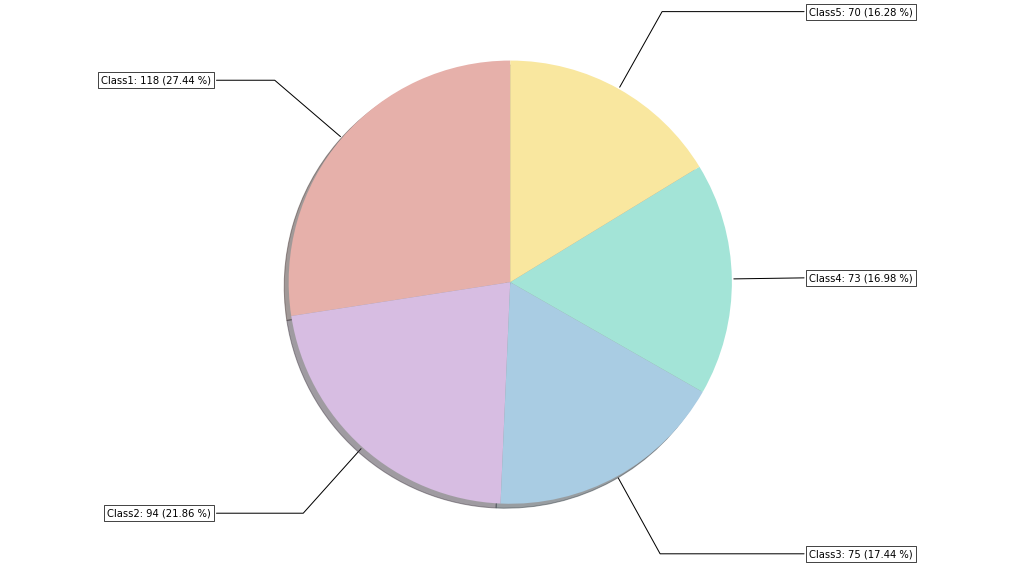

In [156]:
print("Rows, Columns:",df.shape)
Sector = df.groupby('Classes').size()
labels = Sector.index.values
sizes = Sector.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' ({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#E6B0AA','#D7BDE2','#A9CCE3','#A3E4D7','#F9E79F','#D5DBDB','#AEB6BF','#EDBB99','#5DADE2','#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

In [157]:
# Check for null values

df.isna().sum() 

A2M        0
AAAS       0
AAK1       0
AAMP       0
AARS       0
          ..
ZXDC       0
ZYG11B     0
ZYX        0
ZZZ3       0
Classes    0
Length: 5949, dtype: int64

**Create Train and Test Dataset**

In [158]:
# Creating train and test data

X = df.drop(['Classes'], axis=1)
y = df['Classes']

In [159]:
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(344, 5948)
(344,)
(86, 5948)
(86,)


###The ML technique required and the performance evaluation with and without parameter optimization

**Remove Collinear Variables**

In [160]:
# Threshold for removing highly correlated variables with Pearson correlation coefficient being greater than 0.9.
threshold = 0.90

corr_matrix =pd.DataFrame(X_train).corr(method='pearson').abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


There are 13 columns to remove.


In [161]:
# Removing 13 columns with high correlation

print(to_drop)

['ADAMTSL3', 'ATP9B', 'C12orf55', 'HSPA1L', 'KIAA1328', 'LINC00504', 'MIPOL1', 'MORC4', 'RHOT1P3', 'SHISA9', 'TBC1D8B', 'TMEM45A', 'TMEM212']


In [162]:
X_train = X_train.drop(['ADAMTSL3', 'ATP9B', 'C12orf55', 'HSPA1L', 'KIAA1328', 'LINC00504', 'MIPOL1', 'MORC4', 'RHOT1P3', 'SHISA9', 'TBC1D8B', 'TMEM45A', 'TMEM212'], axis=1)

In [163]:
X_test = X_test.drop(['ADAMTSL3', 'ATP9B', 'C12orf55', 'HSPA1L', 'KIAA1328', 'LINC00504', 'MIPOL1', 'MORC4', 'RHOT1P3', 'SHISA9', 'TBC1D8B', 'TMEM45A', 'TMEM212'], axis=1)

In [164]:
print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)

Training shape:  (344, 5935)
Testing shape:  (86, 5935)


In [165]:
print('Labels Training shape: ', y_train.shape)
print('Labels Testing shape: ', y_test.shape)

Labels Training shape:  (344,)
Labels Testing shape:  (86,)


**Feature Selection**

In [166]:
import lightgbm as lgb

feature_importances = np.zeros(X_train.shape[1])

model = lgb.LGBMClassifier(objective='multiclass', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [167]:
# Train using early stopping
model.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], eval_metric = 'multi_logloss', verbose = 200)
    
# Record the feature importances
feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds.
[200]	valid_0's multi_logloss: 0.134496	valid_0's multi_logloss: 0.134496
Early stopping, best iteration is:
[120]	valid_0's multi_logloss: 0.11732	valid_0's multi_logloss: 0.11732


In [170]:
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head(10)

,feature,importance
4410,SEC61G,40.5
1812,FIGNL1,17.0
4255,RPS4Y1,16.0
4676,SNRPN,15.0
379,ATP1A2,14.0
2193,HLA-A,13.5
3221,NGFRAP1,10.5
392,ATP5G3,9.5
731,CADPS,8.5
4972,TF,8.5


In [171]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail(100)

There are 4694 features with 0.0 importance


,feature,importance
2112,GYG1,0.0
2121,HADH,0.0
2120,HACL1,0.0
2117,H2AFZ,0.0
2116,H2AFY,0.0
...,...,...
2206,HMGCL,0.0
2204,HMGB2,0.0
2203,HMGB1,0.0
2202,HMG20A,0.0


In [172]:
X_train = X_train.drop(columns = zero_features)
X_test = X_test.drop(columns = zero_features)

print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)

Training shape:  (344, 1241)
Testing shape:  (86, 1241)


**Scale the data and fit the model**

In [173]:
# Normalize the train and test data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [174]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_scaled,y_train)
y_pred = neigh.predict(X_test_scaled)

**Confusion Matrix and Classification Report**

In [176]:
# CM and Classification Report For **SCALED DATA**

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
score_knn = accuracy_score(y_test, y_pred)
print("accuracy score: %0.3f" % score_knn)

              precision    recall  f1-score   support

      Class1       0.97      0.94      0.95        31
      Class2       1.00      0.70      0.82        20
      Class3       0.38      1.00      0.55        11
      Class4       1.00      0.43      0.60         7
      Class5       0.90      0.53      0.67        17

    accuracy                           0.77        86
   macro avg       0.85      0.72      0.72        86
weighted avg       0.89      0.77      0.79        86

0.7674418604651163
accuracy score: 0.767


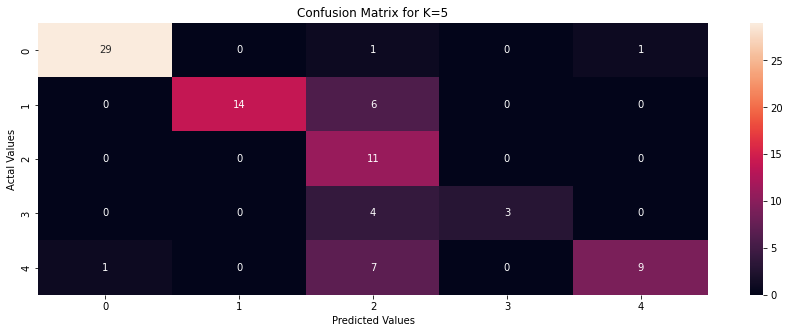

In [175]:
# Confusion matrix for k=5 for SCALED DATA

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(15,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix for K=5')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Scaling the data actually gives lower accuracy score, so let's try without scaling any data!!**

In [177]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = neigh.predict(X_test)

In [178]:
#CM and classification report without scaling data

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
score_knn = accuracy_score(y_test, y_pred)
print("accuracy score: %0.3f" % score_knn)

              precision    recall  f1-score   support

      Class1       0.97      0.94      0.95        31
      Class2       1.00      0.95      0.97        20
      Class3       0.50      1.00      0.67        11
      Class4       1.00      0.43      0.60         7
      Class5       0.83      0.59      0.69        17

    accuracy                           0.84        86
   macro avg       0.86      0.78      0.78        86
weighted avg       0.89      0.84      0.84        86

0.8372093023255814
accuracy score: 0.837


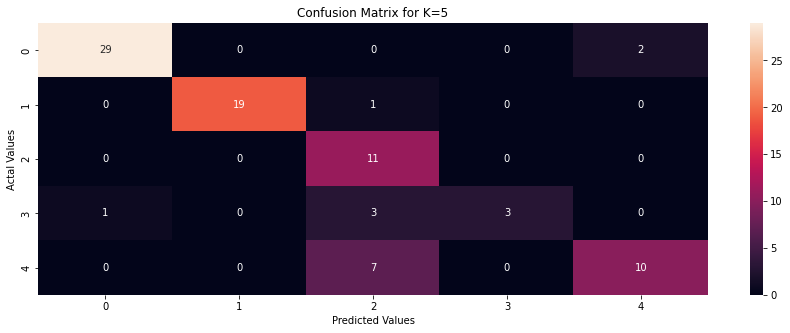

In [179]:
# Confusion matrix for k=5 for NOT scaling data

cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(15,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix for K=5')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

###Apply parameters optimization

**Step 1: testing different k (k=1 to k=50) based on accuracy score and error rate.**

**Step 2: hyperparameter tuning and test k=1 and other parameters.**

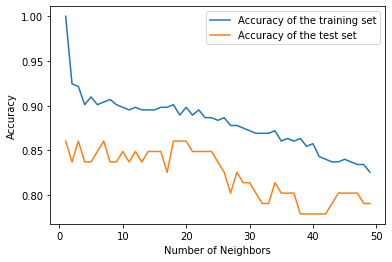

In [180]:
# Choosing K, given a range from k=1 to k=20

training_accuracy = []
test_accuracy = []

neighbors_setting = range(1,50)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

Text(0, 0.5, 'Accuracy')

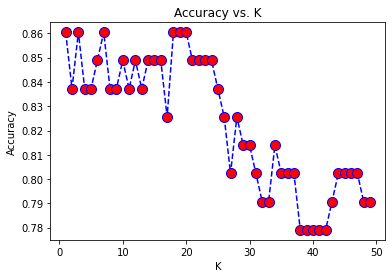

In [181]:
# Examine accuracy score from k=1 to k=50

import sklearn.metrics as metrics

acc = []
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.plot(range(1,50),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Error Rate')

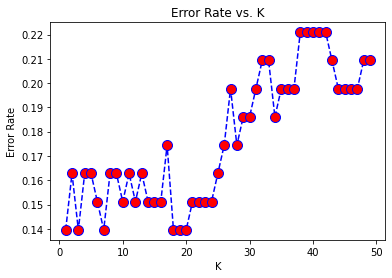

In [182]:
# Examine error rate from k=1 to k=50

error_rate = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [183]:
# Testing k=20 and print the model's accuracy score: .9042

k = 20
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred1 = neigh.predict(X_test)
print("Accuracy of model at K=20 is",metrics.accuracy_score(y_test, y_pred1))

Accuracy of model at K=20 is 0.8604651162790697


In [184]:
# Classification report for k=20

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

      Class1       1.00      1.00      1.00        31
      Class2       1.00      0.90      0.95        20
      Class3       0.48      1.00      0.65        11
      Class4       1.00      0.57      0.73         7
      Class5       1.00      0.59      0.74        17

    accuracy                           0.86        86
   macro avg       0.90      0.81      0.81        86
weighted avg       0.93      0.86      0.87        86



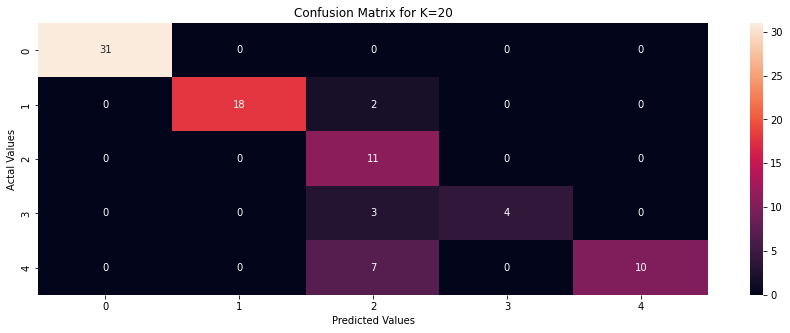

In [185]:
# Confusion matrix for k=20

cm20 = confusion_matrix(y_test, y_pred1)

cm20_df = pd.DataFrame(cm20)

plt.figure(figsize=(15,5))
sns.heatmap(cm20_df, annot=True, fmt='g')
plt.title('Confusion Matrix for K=20')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Hyperparameter Tuning**

In [186]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

parameters_k = {"n_neighbors": range(1, 25)}

gs = GridSearchCV(KNeighborsClassifier(), param_grid = parameters_k, verbose = 1, cv=10, n_jobs = -1)

g_res = gs.fit(X_train, y_train)

g_res.best_params_

Fitting 10 folds for each of 24 candidates, totalling 240 fits


{'n_neighbors': 1}

In [187]:
# Using the parameters from hyperparameter tuning to fit the model and print accuracy score: 0.9053

neigh = KNeighborsClassifier(n_neighbors = 1).fit(X_train,y_train)
y_pred2 = neigh.predict(X_test)
print("Accuracy of model at K=1 is",metrics.accuracy_score(y_test, y_pred2))

Accuracy of model at K=1 is 0.8604651162790697


              precision    recall  f1-score   support

      Class1       1.00      0.94      0.97        31
      Class2       1.00      0.95      0.97        20
      Class3       0.52      1.00      0.69        11
      Class4       1.00      0.57      0.73         7
      Class5       0.85      0.65      0.73        17

    accuracy                           0.86        86
   macro avg       0.87      0.82      0.82        86
weighted avg       0.91      0.86      0.87        86



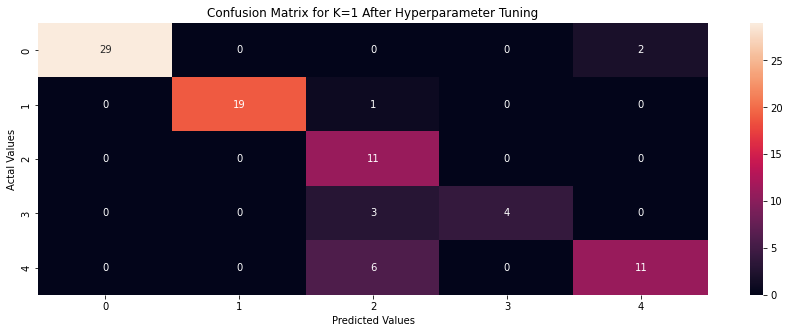

In [188]:
print(classification_report(y_test, y_pred2))

# Confusion matrix for k=1 after hyperparameter tuning

cm2 = confusion_matrix(y_test, y_pred2)

cm2_df = pd.DataFrame(cm2)

plt.figure(figsize=(15,5))
sns.heatmap(cm2_df, annot=True, fmt='g')
plt.title('Confusion Matrix for K=1 After Hyperparameter Tuning')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

##Discuss the result

In [189]:
print("Accuracy of model at K=5 is",metrics.accuracy_score(y_test, y_pred))
print("Accuracy of model at K=20 is",metrics.accuracy_score(y_test, y_pred1))
print("Accuracy of model at K=1 after HYPERPARAMETER TUNING is",metrics.accuracy_score(y_test, y_pred2))

Accuracy of model at K=5 is 0.8372093023255814
Accuracy of model at K=20 is 0.8604651162790697
Accuracy of model at K=1 after HYPERPARAMETER TUNING is 0.8604651162790697


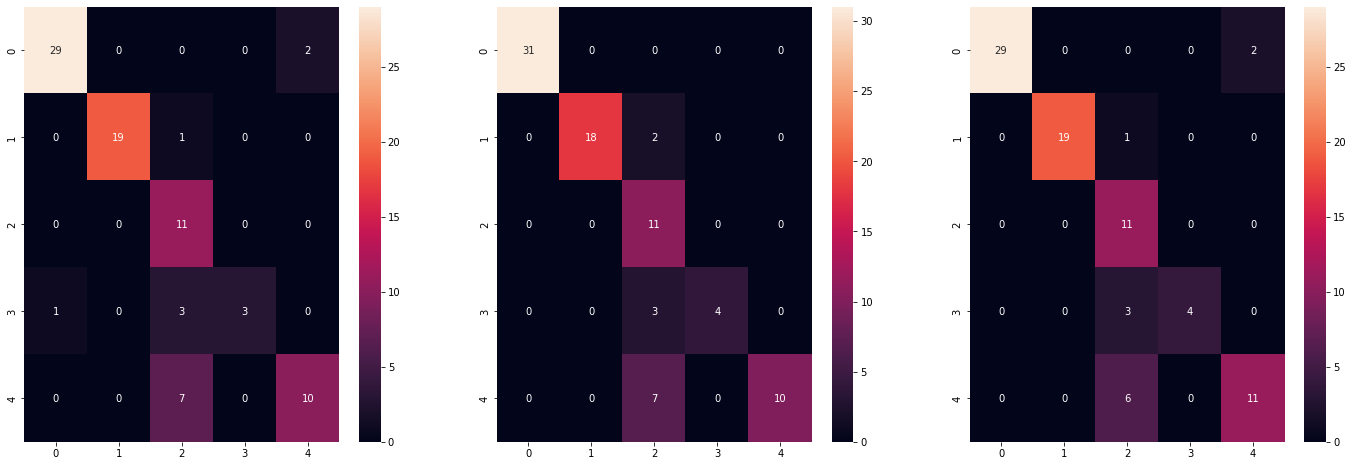

In [190]:
fig, ax =plt.subplots(1,3,figsize=(24,8))

#CM at k=5
sns.heatmap(cm_df, annot=True, fmt='g', ax=ax[0])

#CM at k=20
sns.heatmap(cm20_df, annot=True, fmt='g', ax=ax[1])

#CM at k=1 after hyperparameter tuning
sns.heatmap(cm2_df, annot=True, fmt='g', ax=ax[2])

plt.show()

In [191]:
X_train.shape

(344, 1241)

#SUMMARY:

**After removing  highly correlated variables and using feature selection to eliminiate 13+4696 columns, we were down to 344 rows and 1241 columns remaining.**

**Scaling the data actually give us a lower accuracy score at .7670. Hence I used the non-scaled X_train and X_test data.**

**The above shows confusion matrix for k=5(left), k=20(middle), and k=1 after hyperparameter tuning(right). The accuracy score is 0.8372, 0.8604, and 0.8604.**

**By parameter optimization from k=5 to k=20, I improved the model accuracy from 0.8372 to .8604. After hyperparameter tuning, the accuracy score at k=20 vs. k=1 is the same. I plotted accuracy score and error rate to look for the best k. After I used hyperparameter tuning to find the best k. From the k=20 confusion matrix in the middle, the diagonal numbers 31,18,11,4,10 are the TRUE POSITIVES. Just from changing from from 5 to 20, we have more  TRUE POSITIVES values.**